In [29]:
import glob
import pandas as pd
import requests
from io import BytesIO
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [288]:
csv_files=glob.glob('./face_box/*.csv')
len(csv_files)

18293

In [262]:
test_f=pd.read_csv(csv_files[5])

In [263]:
test_f

,photo_image_url,face_boxs
0,https://images.unsplash.com/photo-158507010536...,[[ 37 415 42 42]]


In [304]:
def cropface(image, box, fill=.5, ratios=(1,1)):
    shape = image.shape
    if len(shape) > 2 :
        h_img,w_img,c_img = shape
    else:
        h_img,w_img = shape

    Ry, Rx = ratios
    x,y,w,h = box
    print(box)
    

    new_y,new_x = Ry*y, Rx*x
    y_fill = max(0, new_y-h*fill)
    x_fill = max(0, new_x-w*fill)

    new_h, new_w = Ry*(h+y), Rx*(w+x)
    
    h_fill = min(h_img, new_h+h*fill)
    w_fill = min(w_img, new_w+w*fill)
    
    return image[int(y_fill):int(h_fill),
               int(x_fill):int(w_fill)]

In [266]:
test_f['photo_image_url'][0]

'https://images.unsplash.com/photo-1585070105361-a13b5623791c?width=512'

In [267]:
test_f['face_boxs'][0]

'[[ 37 415  42  42]]'

In [268]:
cords=[int(i) for i in test_f['face_boxs'][0].replace(']','').replace('[','').split(' ') if i]

In [269]:
cords[0:4]

[37, 415, 42, 42]

[37, 415, 42, 42]


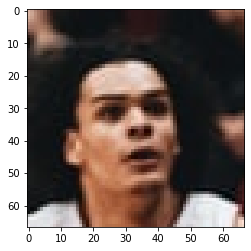

In [305]:
image_bytes_s = requests.get(test_f['photo_image_url'][0])

image_bytes_s = image_bytes_s.content
image_stream_s = BytesIO(image_bytes_s)
img_open_s = np.array(Image.open(image_stream_s))

plt.imshow(cropface(img_open_s, cords[0:4], fill=0.3))
og_shape=img_open_s.shape

In [306]:
image_bytes = requests.get(test_f['photo_image_url'][0].split('?')[0])

image_bytes = image_bytes.content
image_stream = BytesIO(image_bytes)
img_open = np.array(Image.open(image_stream))
new_shape=img_open.shape

In [307]:
og_shape, new_shape

((768, 512, 3), (5801, 3867, 3))

In [308]:
ratios=new_shape[0]/og_shape[0],new_shape[1]/og_shape[1]
ratios

(7.553385416666667, 7.552734375)

[37, 415, 42, 42]


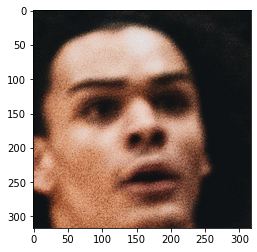

In [309]:
plt.imshow(cropface(img_open, cords[0:4], fill=0, ratios=ratios))

[37, 415, 42, 42]


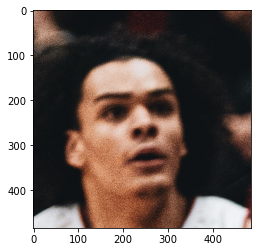

In [315]:
plt.imshow(cropface(img_open, cords[0:4], fill=2, ratios=ratios))

## Merge data and recalculate square

In [384]:
def parse_cords(cord_string):
    
    cords=[int(i) for i in cord_string.replace(']','').replace('[','').split(' ') if i]
    # print(cords)
    cords=np.reshape(cords, (len(cords)//4,4))
    return cords

def recal_box(box_cords, old_shape, new_shape):
    recal_boxes=[]
    
    for box in box_cords:
        Ry, Rx=new_shape[0]/og_shape[0],new_shape[1]/og_shape[1]

        x,y,w,h = box
        new_y, new_x = int(Ry*y), int(Rx*x)

        new_h, new_w = int(Ry*h), int(Rx*w)
        
        recal_boxes.append((new_x, new_y, new_w, new_h))

    return recal_boxes


In [317]:
csv_files=glob.glob('./face_box/*.csv')
len(csv_files)

24832

In [318]:
for i, csv_p in enumerate(csv_files):
    test_recal=pd.read_csv(csv_p)
    if len(parse_cords(test_recal['face_boxs'][0]))> 4:
        print(i)
        break


331


In [319]:
test_recal=pd.read_csv(csv_files[192])
tsd=parse_cords(test_recal['face_boxs'][0])

In [320]:
tsd

array([[164,  79, 181, 181]])

In [237]:
test_recal=pd.read_csv(csv_files[192])

image_bytes_s = requests.get(test_recal['photo_image_url'][0])

image_bytes_s = image_bytes_s.content
image_stream_s = BytesIO(image_bytes_s)
img_open_s = np.array(Image.open(image_stream_s))

image_bytes = requests.get(test_f['photo_image_url'][0].split('?')[0])
image_bytes = image_bytes.content
image_stream = BytesIO(image_bytes)
img_open = np.array(Image.open(image_stream))

og_shape=img_open_s.shape
new_shape=img_open.shape



In [321]:
print(parse_cords(test_recal['face_boxs'][0]))
recal_box(parse_cords(test_recal['face_boxs'][0]),og_shape, new_shape)

[[164  79 181 181]]


[(1238, 596, 1367, 1367)]

In [322]:
csv_files = glob.glob('./face_box/*.csv')

result_dict = {
    'photo_image_url': [],
    'face_box_cords': []
}

for i, csv in enumerate(csv_files):
    cur = pd.read_csv(csv)

    image_bytes_s = requests.get(cur['photo_image_url'][0])

    image_bytes_s = image_bytes_s.content
    image_stream_s = BytesIO(image_bytes_s)
    img_open_s = np.array(Image.open(image_stream_s))

    image_bytes = requests.get(test_f['photo_image_url'][0].split('?')[0])
    image_bytes = image_bytes.content
    image_stream = BytesIO(image_bytes)
    img_open = np.array(Image.open(image_stream))

    og_shape=img_open_s.shape
    new_shape=img_open.shape    
    
    result_dict['face_box_cords'].append(recal_box(parse_cords(cur['face_boxs'][0]),og_shape, new_shape))
    result_dict['photo_image_url'].append(cur['photo_image_url'][0])
    
    print(f'{i}/{len(csv_files)}', end='\r')
    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
final_merge = pd.DataFrame.from_dict(result_dict)

In [ ]:
final_merge.head()

,photo_image_url,face_box_cords
0,https://images.unsplash.com/photo-149490027836...,"[(1789, 2734, 460, 460)]"
1,https://images.unsplash.com/photo-149596972476...,"[(1925, 1484, 339, 767)]"
2,https://images.unsplash.com/photo-156477844114...,"[(2371, 1207, 838, 1888)]"
3,https://images.unsplash.com/photo-159331799366...,"[(211, 2344, 249, 280)]"
4,https://images.unsplash.com/photo-153817186792...,"[(1744, 3215, 332, 748)]"


In [ ]:
final_merge.to_csv('./merge_face_cords.csv', sep=';', index=False)

In [338]:
final_merge=pd.read_csv('./merge_face_cords.csv', sep=';')

In [339]:
final_merge.head()

,photo_image_url,face_box_cords
0,https://images.unsplash.com/photo-149490027836...,"[(1789, 2734, 460, 460)]"
1,https://images.unsplash.com/photo-149596972476...,"[(1925, 1484, 339, 767)]"
2,https://images.unsplash.com/photo-156477844114...,"[(2371, 1207, 838, 1888)]"
3,https://images.unsplash.com/photo-159331799366...,"[(211, 2344, 249, 280)]"
4,https://images.unsplash.com/photo-153817186792...,"[(1744, 3215, 332, 748)]"


In [381]:
final_merge['photo_image_url']=final_merge['photo_image_url'].str.split('?').str[0]

In [382]:
final_merge['photo_image_url'].iloc[10]

'https://images.unsplash.com/photo-1594097345019-b355d3f079b7'

In [383]:
final_merge.to_csv('./merge_face_cords_final.csv', sep=';', index=False)